In order to successfully complete this assignment you need to:
1. Participate both individually and in groups during class.
2. Submit this notebook to the `exercise` folder in your `cmse802-yourlastname` repository by 10pm __the SAME DAY of the class__. Late assignment will receive <=80% of the grade.

### <p style="text-align: left;"> &#9989; Rupita Tahsin

---
# __Linear Algebra 1: Least Square Fit Examples__

<img src="https://community.cloudera.com/t5/image/serverpage/image-id/25068iFF075A5AEC3B8528/image-size/medium?v=1.0&px=400"> (from <a href="https://community.cloudera.com/t5/Community-Articles/Understanding-Linear-Regression/ta-p/281391"> here </a>)

Todays in-class assignment includes multiple Least Squares Fit models.  The goal is to see the types of models that can be solved using least squares fit.  Even though this is a Linear Algebra Method the models do not need to be linear.  

**As soon as you get to class, download and start working on this notebook**: Try and help your neighbors. the instructor will go over solutions but make sure you try to understand and solve them on your own.

# Learning objectives

At the end of the exercise, you should be able to:
- Solve a simple equation with LSF.
- Solve a system of ODEs with LSF.
- Simplify a function so it can be solved with LSF.

In order to successfully complete this assignment you need to:
1. Participate both individually and in groups during class.
2. Submit this notebook to the `exercise` folder in your `cmse802-yourlastname` repository by 10pm __the SAME DAY of the class__. Late assignment will receive <=80% of the grade.

### <p style="text-align: left;"> &#9989; Saima Alam </p>

### Agenda for today's class (80 minutes)

</p>




1. [(20 minutes) Pre-class Review](#Pre-class_Review)
2. [(20 minutes) LSF Example: Tracking the Planets](#Tracking_the_Planets)
1. [(20 minutes) LSF Example: Predator-Pray Model (revisited)](#Predator-Pray_Model)
2. [(20 minutes) LSF Example: Estimating the best Ellipses](#Estimating_the_best_Ellipses)


----
<a name="preclass"></a>

# 1. Pre-Class Assignment Review

In your group, discussion the following.

&#9989; <font color=red>**QUESTION:**</font> Did you get stuck doing pre-class exercise or find some ideas confusing? If so where did you get stuck? What did you find confusing? What solutions did your groupmates suggest?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

We  were all able to finish the pre-class without much hiccup.

----
<a name="Tracking_the_Planets"></a>

# 2. LSF Example: Tracking the Planets

## 2.1 Relation between planet indices and distances to the sun


<img src="https://images.squarespace-cdn.com/content/v1/537a20bce4b0c4a5e913ae77/1533010529325-0H1VQX4W19MAJCRGSTQF/ke17ZwdGBToddI8pDm48kJokDDWUnHQ7jYDwh9g9o2tZw-zPPgdn4jUwVcJE1ZvWQUxwkmyExglNqGp0IvTJZUJFbgE-7XRK3dMEBRBhUpy5LokhjEjEjl7mG0bnsgbfHG96R3ZWfXdsfqmd9qx-1I79M1PjxisoyjE5_sBXuWQ/solar-system-439046_640.jpg?format=1500w" width="100%">
  
The following table lists the average distance from the sun to each of the first seven planets, using Earth's distance as a unit of measure (AUs). 

| Mercury | Venus | Earth | Mars | Jupiter | Satern | Uranus | 
|---------|-------|-------|------|---------|--------|--------|
| 0.39    | 0.72  | 1.00  | 1.52 | 5.20    | 9.54   | 19.2   |

The following is a plot of the data:

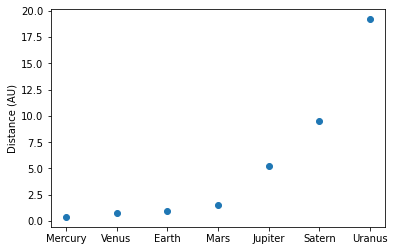

In [113]:
# Here are some libraries you may need to use

%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
import math
sym.init_printing()

distances = [0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.2]
planets = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Satern','Uranus']
ind = [1.0,2.0,3.0,4.0,5.0,6.0,7.0]

plt.scatter(ind, distances);
plt.xticks(ind,planets)
plt.ylabel('Distance (AU)')
plt.show()

**Note** that the above plot does not look like a line, and so finding the line of best fit is not fruitful.  It does, however look like an exponential curve (maybe a polynomial?). The following step transforms the distances using the numpy **```log```** function and generates a plot that looks much more linear. 

In [114]:
log_distances = np.log(distances)

plt.scatter(ind,log_distances)
plt.xticks(ind,planets)
plt.ylabel('Distance (log(AU))')
plt.show()

## 2.2 Least square fit

For this question we are going to find the coefficients $c$ (a vector, $[c_1, c_2]$) for the best fit line of the form $c_1 + c_2i= \log{d}$, where $i$ is the index of the planet and $d$ is the distance. For examnple, based on the distances of mercury and venus to the sun, we can write:

$$
c_1 + 1\cdot c_2 = log(0.39) \\
c_1 + 2\cdot c_2 = log(0.72)
$$

&#9989; **<font color=blue>DO THIS:</font>** We want to convert the problem of solving $c_1 + c_2i= \log{d}$ into solving $Ax=b$. In the cell below:

- Define the $A$ matrix as a numpy matrix.
- Define the $b$ vector as a numpy matrix.
- Print out $A$ using `sympy`.

In [115]:
# Put your codes here
P_dist=[1,2,3,4,5,6,7]
A = np.matrix(np.vstack((P_dist, np.ones(len(P_dist)))).T)
sym.Matrix(A)



⎡1.0  1.0⎤
⎢        ⎥
⎢2.0  1.0⎥
⎢        ⎥
⎢3.0  1.0⎥
⎢        ⎥
⎢4.0  1.0⎥
⎢        ⎥
⎢5.0  1.0⎥
⎢        ⎥
⎢6.0  1.0⎥
⎢        ⎥
⎣7.0  1.0⎦

&#9989; **<font color=blue>DO THIS:</font>** Print out $b$ using `sympy`.

In [116]:
Q=[0.39,0.72,1.00,1.52,5.20,9.54,19.2]
Q_dist=[]

for i in range(len(Q)):
    Q_dist.append(math.log(Q[i]))
    
b = np.matrix(Q_dist).T
sym.Matrix(b)

⎡-0.941608539858445⎤
⎢                  ⎥
⎢-0.328504066972036⎥
⎢                  ⎥
⎢       0.0        ⎥
⎢                  ⎥
⎢0.418710334858185 ⎥
⎢                  ⎥
⎢ 1.64865862558738 ⎥
⎢                  ⎥
⎢ 2.2554934854602  ⎥
⎢                  ⎥
⎣ 2.95491027903374 ⎦

&#9989; <font color=blue>**DO THIS:**</font> Solve for the best fit of $Ax=b$ and define a new variable $c$ which consists of the of the two coefficients used to define the line $(\log{d} = c_1 + c_2i)$. Print $c$ using `sympy`.

In [117]:
# Put your answer here:
c= np.linalg.lstsq(A,b, rcond=None)[0]
print(c)

[[ 0.66093608]
 [-1.78550715]]


&#9989; <font color=blue>**DO THIS:**</font> Complete the code below that will define `predicted_log_distances` as is a list of 7 predicted log distances based on estimates of $c_1$ and $c_2$. 

In [118]:
# Modify the following line.
ind=P_dist
predicted_log_distances =A*c # <--- Your code here

print(predicted_log_distances)
plt.plot(ind, predicted_log_distances)
plt.scatter(ind,log_distances)
plt.xticks(ind,planets)
plt.ylabel('Distance (log(AU))')
plt.show()

[[-1.12457107]
 [-0.463635  ]
 [ 0.19730108]
 [ 0.85823716]
 [ 1.51917324]
 [ 2.18010932]
 [ 2.84104539]]


## 2.3 Quality of least square fit

We can determine the quality of this line fit by calculating the root mean squared error (rmse) between the estimate and the actual data:

$$\text{rmse}=\sqrt{\frac{\sum_{i=1}^n(L_{obs,i}-L_{predicted,i})^2}{n}}$$

Where:
- $n$ is the number of observations, 
- $L_{obs,i}$ is the observed log distance value of the $i$ th sample,
- $L_{predicted,i}$ is the predicted log distance value of the $i$ th sample.

&#9989; **<font color=blue>DO THIS:</font>** Write an `get_rmse` function that take two numpy arrays as arguments:

- `obs`: the observed log distances to the sun
- `pred`: the predicted log distance values.

The function should return rmse. Next:
- Call the function by passing `log_distances` and `predicted_log_distances`. 
- Print out rmse.

In [119]:
# put your code here
log_distances=Q_dist
predicted_log_distances=A*c


#MSE = np.square(np.subtract(log_distances,predicted_log_distances)).mean() 
#RMSE = math.sqrt(MSE)
#print("Root Mean Square Error is",RMSE)



In [120]:
def get_rmse(obs,pred):
    MSE=0
    for i in range(len(obs)):
        MSE+= (obs[i]-pred[i])**2
    rmse=np.sqrt(MSE/len(obs))   
    return rmse

In [121]:
print(get_rmse(log_distances,predicted_log_distances))


[[0.21356219]]


Finally, we can also make the plot on the original axis using the inverse of the log (i.e. the exp function):

In [122]:
est_distances = np.exp(predicted_log_distances)
plt.scatter(ind,distances)
plt.plot(ind,est_distances)
plt.xticks(ind,planets)
plt.ylabel('Distance (AU)')
plt.show()

## 2.4 The fit between Mars and Jupiter is particularly bad

One hypothesis is that there is something between them. If that is the case, then the index of Jupyter, Saturn, and Uranus should be increased by 1 to 6, 7, and 8, respectively. 

&#9989; <font color=blue>**DO THIS:**</font> Based on the new indices (`new_ind`) below:

- Find the least square fit.
- Print the rmse of the new fit. Put a comment on whether this is a better fit or not.
- Plot observed log distances and the new predicted log distances.

In [123]:
distances = [0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.2]
planets = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Satern','Uranus']
new_ind = [1,2,3,4,6,7,8]

### PUT YOUR CODE BELOW
A2 = np.matrix(np.vstack((new_ind, np.ones(len(new_ind)))).T)
c2= np.linalg.lstsq(A2,b, rcond=None)[0]
print("The new values of c1 and c2 are",c)


log_distances=Q_dist
predicted_log_distances=A2*c2
RMSE2=get_rmse(log_distances,predicted_log_distances)
print("The new Root Mean Square Error is",RMSE2)




The new values of c1 and c2 are [[ 0.66093608]
 [-1.78550715]]
The new Root Mean Square Error is [[0.11897289]]


In [124]:
#New plot
est_distances2 = np.exp(predicted_log_distances)
plt.scatter(new_ind,distances)
plt.plot(new_ind,est_distances2)
plt.xticks(new_ind,planets)
plt.ylabel('Distance (AU)')
plt.show()

The new fit looks better than the lats one between mars and jupiter and also theb rmse value reduces from 0.21 to 0.11 with the new indexes.

&#9989; <font color=blue>**DO THIS:**</font> This model of planet location was used to help discover Neptune and prompted people to look for the "missing planet" in position 5 which resulted in the discovery of the asteroid belt.  Based on the above model, what is the estimated  distance of the asteroid belt and Neptune (index 9) from the sun in AUs? Check your answer by searching for the answer on-line).

In [125]:
# Put your prediction calcluation here
#The asteroid belt is index 5
#Neptune is index 9

#Estimating the distance

distance_asteroids =math.exp((c2[1]+c2[0]*5))
distance_neptune =math.exp((c2[1]+c2[0]*9))
print("Predicted distance of asteroid belt in AU is",distance_asteroids)
print("Predicted distance of neptune in AU is",distance_neptune)


Predicted distance of asteroid belt in AU is 3.223399754117596
Predicted distance of neptune in AU is 28.669472952878614



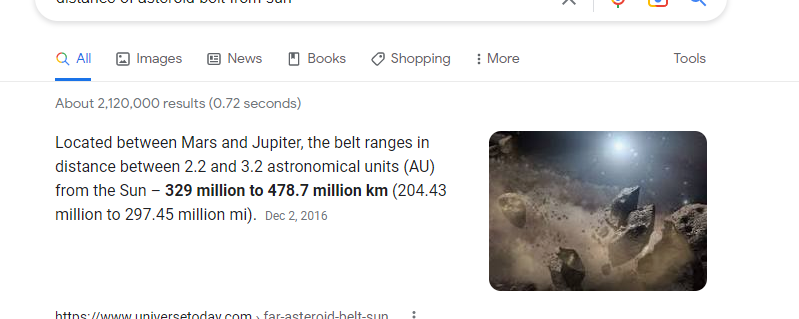
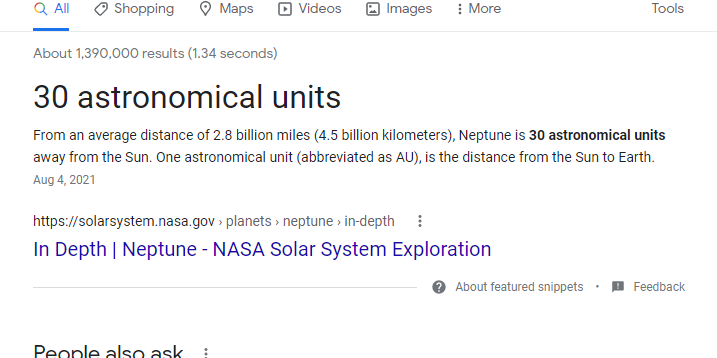

The results are pretty close to actual google data 

----
<a name="Predator-Pray_Model"></a>
         
# 3. LSF Example: Predator-Pray Model (revisited)

<img src="https://cdn.pixabay.com/photo/2016/06/14/15/46/cat-1456878_1280.png" width=30%>

## 3.1 ODEs and data

Let's revisit the predator-pray model from Day17 and see if we can solve it using LSF?

$$
\frac{dx}{dt} = \dot x = ax + bxy \\
\frac{dy}{dt} = \dot y = cy + pxy
$$

Where $a$, $b$, $c$, $p$ are parameters for the model and our goals will be to find their values based on $x$, $y$, and $t$.


&#9989; **<font color=blue>DO THIS</font>** Read the data and plot them


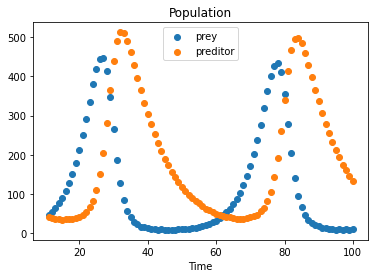

In [126]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

# The first column is time 't', 
# the second column is coordinate 'x', 
# and the last column is coordinate 'y'.
data = pd.read_csv("data_prey_predator.csv", index_col=0)
data = np.array(data)
t = data[:,0]
x = data[:,1]
y = data[:,2]
plt.scatter(t,x)
plt.scatter(t,y)
plt.legend(('prey', 'preditor'))
plt.xlabel('Time')
plt.title('Population');

## 3.2 Numerical differentiation

&#9989; **<font color=blue>DO THIS</font>** In the cell below, we use Numerical Differentiation (more specifically, finite differences) to define $\frac{dx}{dt}$ (called it `dx`), $\frac{dy}{dt}$ (called it `dy`), and $xy$ with $x$, $y$, and $t$. Recall that a derivative can be numerically evaluated as a finite approximation:

$$
\frac{dx}{dt} \approx \frac{x(t +\Delta t)-x(t)}{\Delta t}
$$

__Note__:
- `x` and `y` are numpy arrays and when mathematical operators are used on them, the operator will be applied element-wise. Keep that in mind when you define the variables.
- We will ignore the 1st and the last points.



In [127]:
#Numerically Calculate derivaties

dx = (x[2:]-x[:-2])/(t[2:]-t[:-2]) 

# Put your code in the next line
dy =  (y[2:]-y[:-2])/(t[2:]-t[:-2]) # <--- Fill this in

sx = x[1:-1]
sy = y[1:-1]

xy = sx*sy


In [150]:
print((np.matrix(dx)))
print(sx)
print(xy)

[[ 9.1300e+00  1.1185e+01  1.3155e+01  1.5870e+01  1.8715e+01  2.1815e+01
   2.5930e+01  3.0525e+01  3.5130e+01  3.9745e+01  4.2520e+01  4.4680e+01
   4.2665e+01  3.2445e+01  1.3675e+01 -1.5760e+01 -5.0295e+01 -7.4355e+01
  -7.9735e+01 -6.8665e+01 -5.1160e+01 -3.5415e+01 -2.2645e+01 -1.3975e+01
  -8.8300e+00 -6.3500e+00 -3.9450e+00 -2.4700e+00 -2.0000e+00 -7.0500e-01
  -1.2750e+00 -4.7000e-01  1.8000e-01 -2.3500e-01 -1.6000e-01 -1.9000e-01
   8.1500e-01  4.7500e-01  9.5000e-02  6.1000e-01  1.6650e+00  1.5150e+00
   1.6300e+00  2.0850e+00  1.9000e+00  3.1150e+00  4.2000e+00  3.8150e+00
   4.3100e+00  6.7250e+00  8.1350e+00  8.6650e+00  9.7450e+00  1.2265e+01
   1.5215e+01  1.7390e+01  2.0770e+01  2.5110e+01  2.8825e+01  3.2885e+01
   3.7130e+01  4.1035e+01  4.2640e+01  4.0175e+01  3.2870e+01  1.7225e+01
  -8.7400e+00 -4.0190e+01 -6.5910e+01 -7.5230e+01 -6.8715e+01 -5.4320e+01
  -3.7150e+01 -2.4835e+01 -1.6815e+01 -9.7600e+00 -6.3100e+00 -4.3900e+00
  -3.9100e+00 -2.6750e+00 -7.3500e-01 

&#9989; **<font color=blue>DO THIS</font>** Plot $x,\frac{dx}{dt}$ and $y,\frac{dy}{dt}$ on a couple of plots. Use the plots to try and check the $\frac{dx}{dt}$ and $\frac{dy}{dt}$ values make sense.

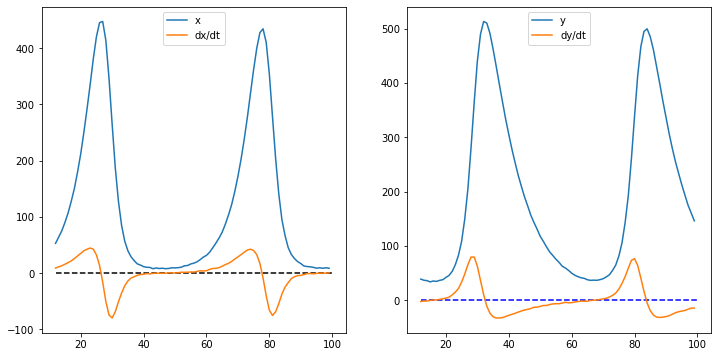

In [129]:
# Plot x and dx/dt
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(t[1:-1],sx, label = 'x')
plt.plot(t[1:-1],dx, label = 'dx/dt')
plt.hlines(0, xmin=t[1], xmax=t[-1], color="black", linestyles='dashed')
plt.legend(loc="upper center")

plt.subplot(1, 2, 2)

# Provide code below to plot y and dy/dt as the second subplot
plt.plot(t[1:-1],sy, label = 'y')
plt.plot(t[1:-1],dy, label = 'dy/dt')
plt.hlines(0, xmin=t[1], xmax=t[-1], color="blue", linestyles='dashed')
plt.legend(loc="upper center")


plt.show()

## 3.3 Solve predator-prey with LSF

&#9989; <font color=blue>**DO THIS**</font>  Formulate a linear system ($Ax=b$) and solve the 1st equation using LSF:

$$
\frac{dx}{dt} = ax + bxy
$$

Print out the solutions for $a$ and $b$.

In [179]:
# put your code here
#here y values are treated as known constants so the A matrix will have [sx xy] to find [a b]
#b=dy/dt


#P = np.vstack(sx)
#Q = np.vstack(xy)

#A=np.hstack((P,Q)).T
#print(A)
#print(P)
#B = np.vstack(dx)
A=np.empty([2,len(sx)])
for i in range (len(sx)):
    A[0][i]= sx[i]
    A[1][i]= xy[i]

A=A.T
B=np.matrix(dx).T
solution= np.linalg.lstsq(A,B, rcond=None)[0]
print(solution)

a=solution[0]
b=solution[1]

[[ 0.20929363]
 [-0.00117533]]


&#9989; <font color=blue>**DO THIS**</font>  Formulate a linear system ($Ax=b$) and solve the 2nd equation using LSF:

$$
\frac{dy}{dt} = cy + pxy
$$

Print out the solution for $c$ and $p$.

In [180]:
# put your code here
A=np.empty([2,len(sy)])
for i in range (len(sy)):
    A[0][i]= sy[i]
    A[1][i]= xy[i]

A=A.T
B=np.matrix(dy).T
solution2= np.linalg.lstsq(A,B, rcond=None)[0]
print(solution2)

c=solution2[0]
p=solution2[1]

[[-0.10251369]
 [ 0.00093566]]


&#9989; <font color=blue>**DO THIS**</font>  After finding the parameters for the predator-prey equations with LSF, we can next use these parameters to integrate the system of ODEs and get the estimated $x$ and $y$ values.

Recall that in Day17 in-class exercise, we have defined a `deriv` function that has the system of equations and used it to call `scipy.integrate.odeint` to integreate the equations and get $x$ and $y$ values:
- Run the following code to see how well the LSF-based parameter predictions fare against what you did last week.
- Comment on the lines with `### COMMENT` to indicate what the code block does and provide DocString for `deriv`.

In [197]:
from scipy.integrate import odeint


def deriv(position,t,a,b,c,p):
    '''
    This function returns the ode int solution of derivative of main variables from 
    the equation when given inputs of time, position and constants
    a,b,c,p
    
    '''
    x = position[0]   ### Taking the first elemenet of the position array as the x-cood 
    y = position[1]   ### Taking the first elemenet of the position array as the x-cood
    dx = a*x + b*x*y  ### Finding the derivative of x based on the predator-prey equation
    dy = c*y + p*x*y  ### Finding the derivative of y based on the predator-prey equation
    return (dx,dy)

x0 = data[0,1] # the 1st x value
y0 = data[0,2] # the 1st y value

### Stores the result of the derivative values in a variable called ret
ret = odeint(deriv, ((x0, y0)), t, args=(a,b,c,p))

### Taking all values in the second column of the csv file as all x values and 
#all values in the 3rd column of the csv file as all y values
all_x = data[:,1]
all_y = data[:,2]

plt.figure(figsize=(5,4))
plt.plot(t,ret)
plt.scatter(t, data[:,1])
plt.scatter(t, data[:,2]);
plt.legend(('x est', 'y est', 'x', 'y'))
plt.xlabel('Time'); plt.ylabel('Number of individuals')
plt.show()

RuntimeError: The array return by func must be one-dimensional, but got ndim=3.

&#9989; <font color=blue>**DO THIS**</font>  Use the provided `rmse` function below and print out the total `rmse` values by comparing predicted $x$ to original $x$ values and predicted $y$ to original $y$ values. 

In [200]:
def rmse(a,b):
    return np.sqrt(np.mean((a-b)**2))



# put your code below

print(rmse(all_x,ret)
print(rmse(all_y,ret)

SyntaxError: invalid syntax (<ipython-input-200-3ed50c208e45>, line 9)

Assuming everything worked the following should plot the result.

&#9989; <font color=red>**QUESTION**</font> Compare these results with those from the prior class.  Are they different? If so which is better and why? Discuss ideas with your group and be prepared to share your ideas with the class.

<font size=+3>&#9998;</font> Replace with your answer to the above question!

The results are different the ode int method is more accurate

----
<a name="Estimating_the_best_Ellipses"></a>
# 4. Example: Estimating the best ellipses

<img src="https://thumbs.gfycat.com/WhimsicalUnequaledBuzzard-max-1mb.gif" width="30%">
  

In [201]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)

## 4.1 Problem statement

Now consider the following sets of points. Think of these as observations of planet moving in an elliptical orbit. 

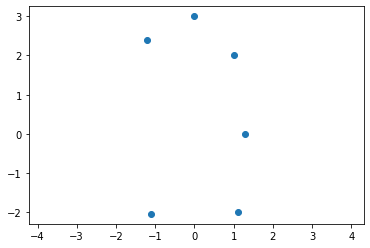

In [202]:
x = [0, 1.0, 1.1, -1.1, -1.2, 1.3]
y = [2*1.5, 2*1.0, 2*-0.99, 2*-1.02, 2*1.2, 2*0]

plt.scatter(x,y)
plt.axis('equal')

In this problem we want to try to fit an ellipse to the above data.  First lets look at a general equation for an ellipse:

$$ \frac{(u+x)^2}{a^2} + \frac{(v+y)^2}{b^2} = 1 \qquad \qquad \text{    (1)}$$

Where $u$ and $v$ are the $x$ and $y$ coordinates for the center of the ellipse and $a$ and $b$ are the lengths of the axes sizes of the ellipse. Now lets expand the original equation (equation 1 from above) and we get the following:

$$x^2−2ux-u^2+y^2−2vy+v^2=r^2 \qquad \qquad \text{    (2)}$$ 

&#9989; **<font color=red>QUESTION:</font>** Can we convert equation 2 into the form $Ax=b$ and solve using Least Squares Fit? Why and why not? Discuss with your group and be prepared to share your thought with the class.

<font size=+3>&#9998;</font> Replace with your answer to the above question!


To convert to linear form we need some known values of the either variuables so that the sqaured term can become  a constant

## 4.2 Simplify equations

If we look at our data more closely we can simplify equations 1 and 2 by assuming the the centroid (u,v) is at the origin.  This assumption results in the following equation:

$$ \frac{x^2}{a^2} + \frac{y^2}{b^2} = 1 \qquad \qquad \text{    (3)}$$

Notice we can rewrite this into a standard linear set of equations by defining $c_o = \frac{1}{a^2}$ and $c_1 = \frac{1}{b^2}$ and rewriting the equation as follows:


$$ c_0x^2 + c_1y^2 = 1 \qquad \qquad \text{    (4)} $$

&#9989; <font color=blue>**DO THIS**</font> Given that we know the $x$ and $y$ values of our point observations, equation 4 is now linear and can be solved using Least Squares Fit.  Using the observation points from above construct  ```A``` and ```b``` as numpy matrixes for the overdefined system $Ax=b$

In [203]:
# put your code below



&#9989; **<font color=blue>DO THIS:</font>** Solve the above over defined system of linear equations for $c_0$ and $c_1$ using LSF.

In [204]:
# put your code below


Assuming we have $c$ in the correct format, we can now calculate $a$ and $b$ from the solution for $c_o$ and $c_1$ calculated in the previous step and plot using our plotting code:

In [205]:
c = 1/np.sqrt(np.abs(c))
b=c[1,0] 
a=c[0,0]
print(a,b)

IndexError: index 1 is out of bounds for axis 0 with size 1

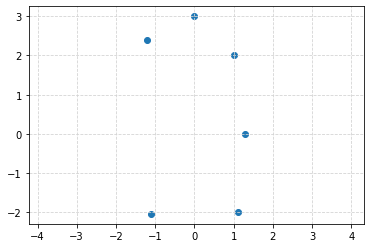

In [206]:
# Ellipse plotting code from:
# https://stackoverflow.com/questions/10952060/plot-ellipse-with-matplotlib-pyplot-python

u=0     #x-position of the center
v=0     #y-position of the center

t = np.linspace(0, 2*np.pi, 100)
plt.plot(u+a*np.cos(t) , v+b*np.sin(t) )
plt.scatter(x,y)
plt.grid(color='lightgray',linestyle='--')
plt.axis('equal');

-----
### Congratulations, we're done!